In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from ensemblecalibration.data.synthetic.binary_new import BinaryExperiment
from ensemblecalibration.meta_model.secondary_model import (
    CredalSetCalibrator,
    LinearCalibrator,
    DirichletCalibrator,
    TemperatureScalingCalibrator,
    MLPCalW,
)
# import min max scaling
from sklearn.preprocessing import MinMaxScaler
from ensemblecalibration.losses.proper_losses import GeneralizedBrierLoss, GeneralizedLogLoss
from ensemblecalibration.data.dataset import MLPDataset
from ensemblecalibration.meta_model.train import train_model
from ensemblecalibration.utils.helpers import ab_scale
from ensemblecalibration.utils.plot_functions import plot_ens_comb_cal

In [2]:
N_SAMPLES = 2000
N_ENS = 3


In [3]:

# Load data
exp = BinaryExperiment(n_samples=N_SAMPLES, n_ens=N_ENS, scale_noise=0.1, kernel_width=0.001)
exp.generate_data()
# init dataset
dataset = MLPDataset(x_train=exp.x_inst, P=exp.ens_preds, y=exp.y_labels,
                    )
data_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)


torch.Size([2000])


Text(0.5, 0, '$x')

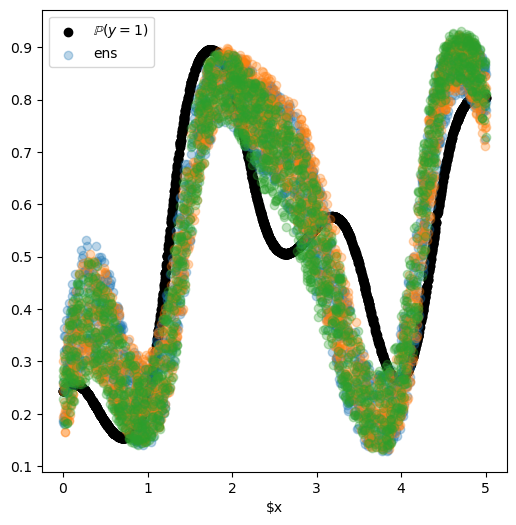

In [4]:
#plot data
ens_preds = exp.ens_preds
p_true = exp.p_true
y_labels = exp.y_labels
# set colormap viridis
sns.set_palette("viridis")
# plot data
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(exp.x_inst.squeeze(), exp.p_true[:,0], label=r"$\mathbb{P}(y=1)$", marker="x")
for i in range(N_ENS):
    ax.scatter(exp.x_inst.squeeze(), ens_preds[:,i,0], alpha=0.3, label=(f"ens" if i==0 else None), color="grey", alpha=0.3)
plt.legend()
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\mathbb{P}(y=1|x)$")

Figure saved to: ../../figures/gp/credal_set_gp_brier loss_joint_DirichletCalibrator.png
Figure saved to: ../../figures/gp/credal_set_gp_brier loss_joint_TemperatureScalingCalibrator.png
Figure saved to: ../../figures/gp/credal_set_gp_brier loss_joint_LinearCalibrator.png
Figure saved to: ../../figures/gp/credal_set_gp_brier loss_alternating_DirichletCalibrator.png
Figure saved to: ../../figures/gp/credal_set_gp_brier loss_alternating_TemperatureScalingCalibrator.png
Figure saved to: ../../figures/gp/credal_set_gp_brier loss_alternating_LinearCalibrator.png
Figure saved to: ../../figures/gp/credal_set_gp_brier loss_avg_then_calibrate_DirichletCalibrator.png
Figure saved to: ../../figures/gp/credal_set_gp_brier loss_avg_then_calibrate_TemperatureScalingCalibrator.png
Figure saved to: ../../figures/gp/credal_set_gp_brier loss_avg_then_calibrate_LinearCalibrator.png
Figure saved to: ../../figures/gp/credal_set_gp_log loss_joint_DirichletCalibrator.png
Figure saved to: ../../figures/gp/cre

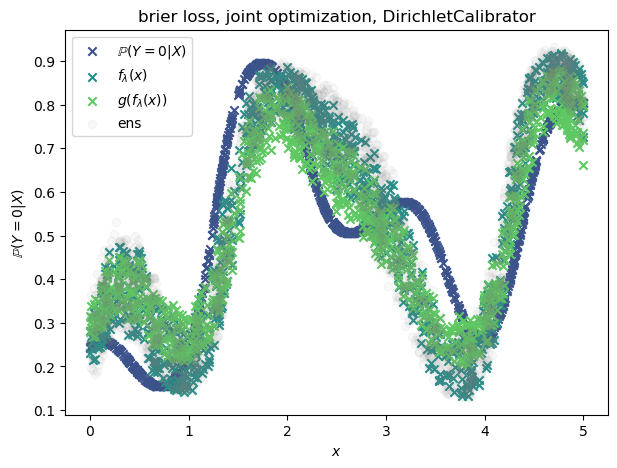

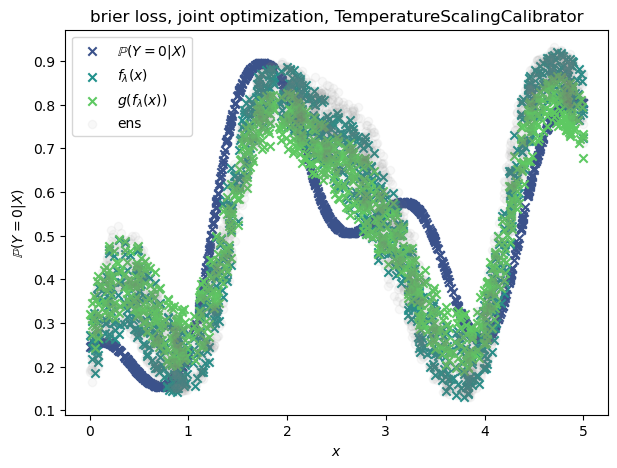

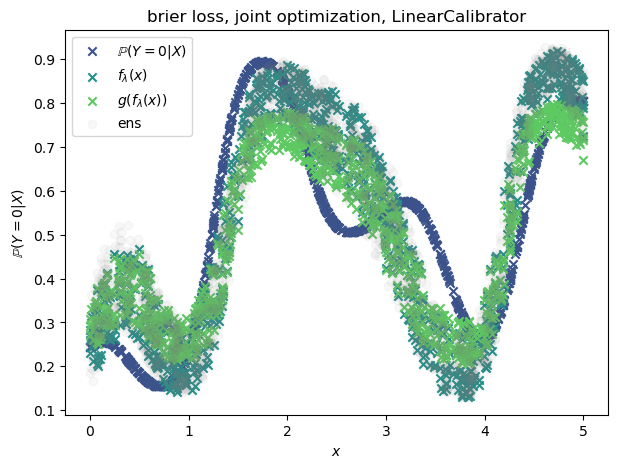

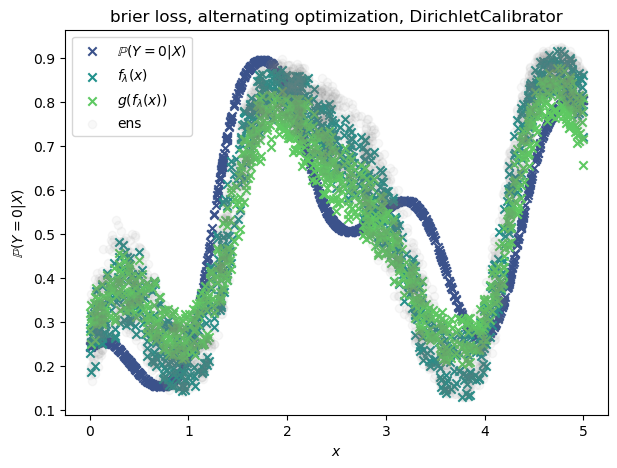

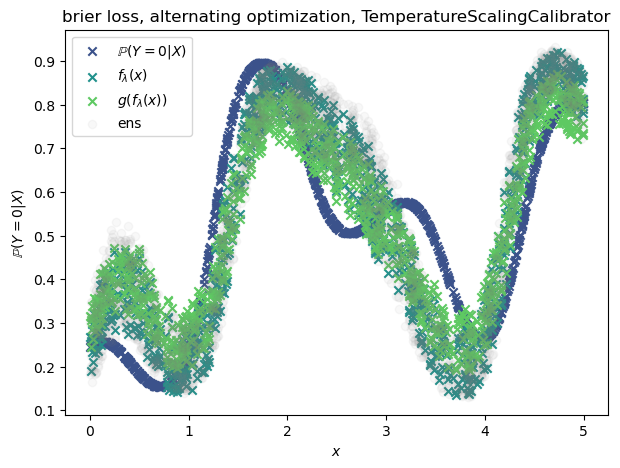

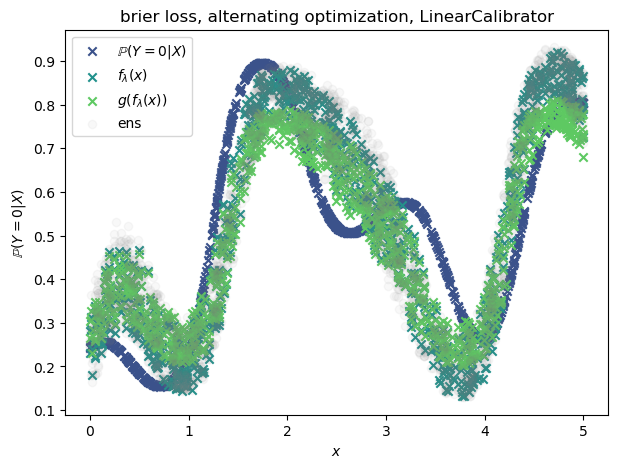

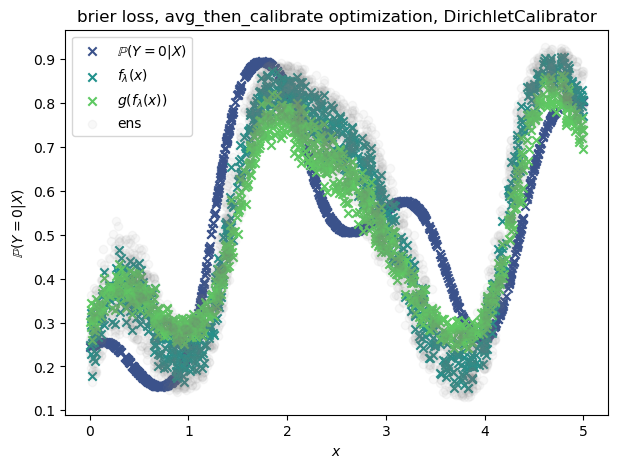

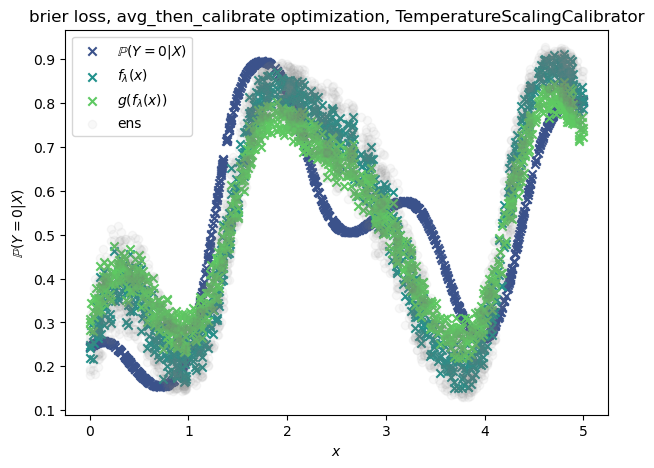

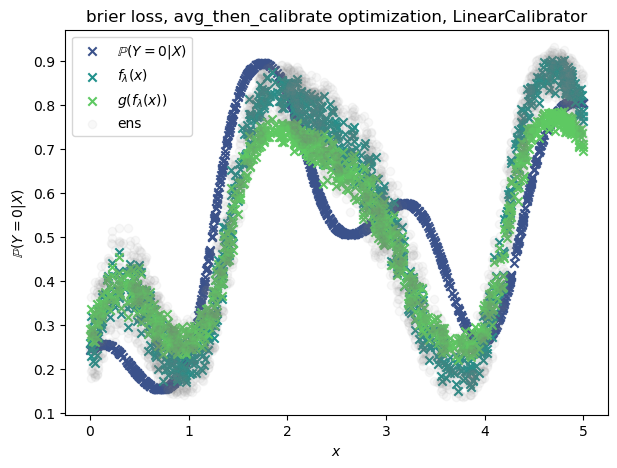

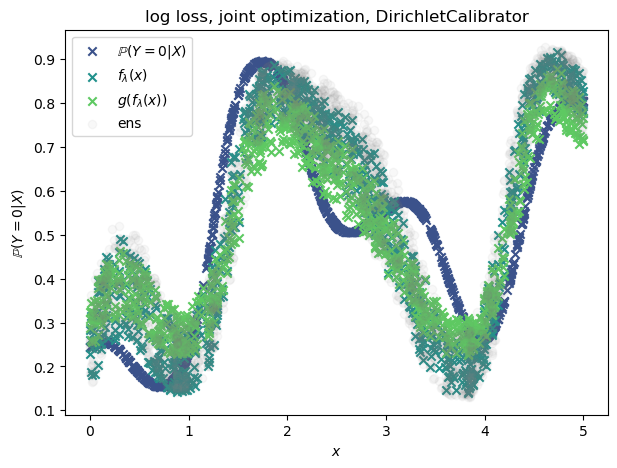

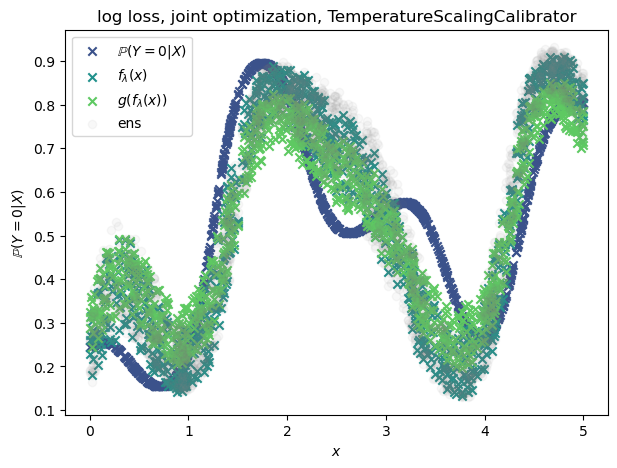

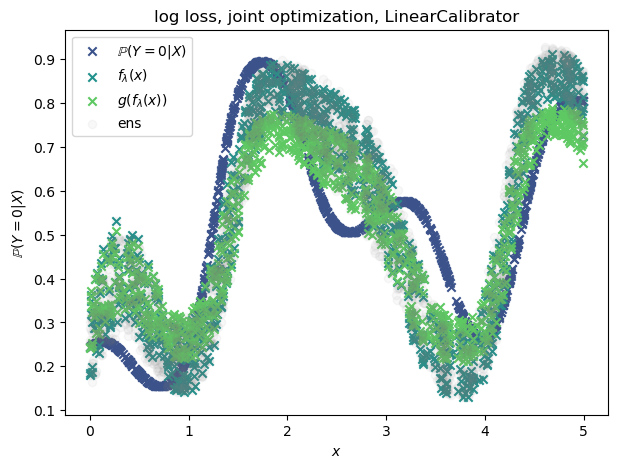

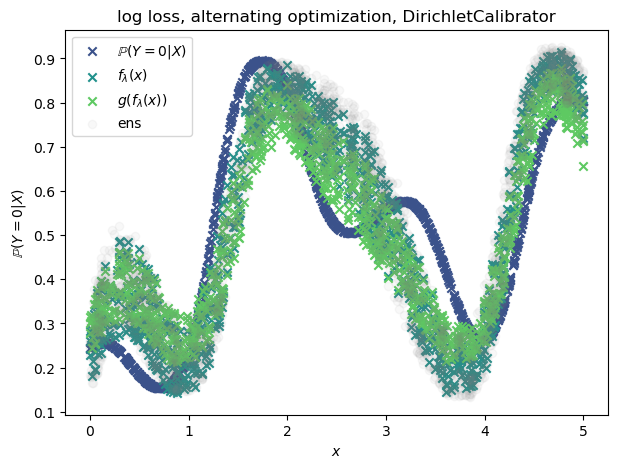

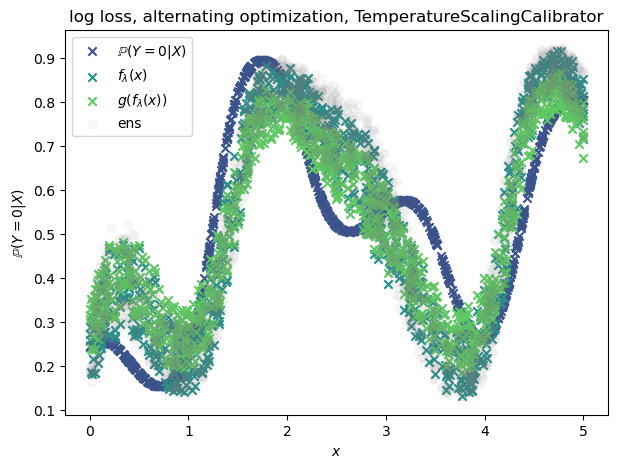

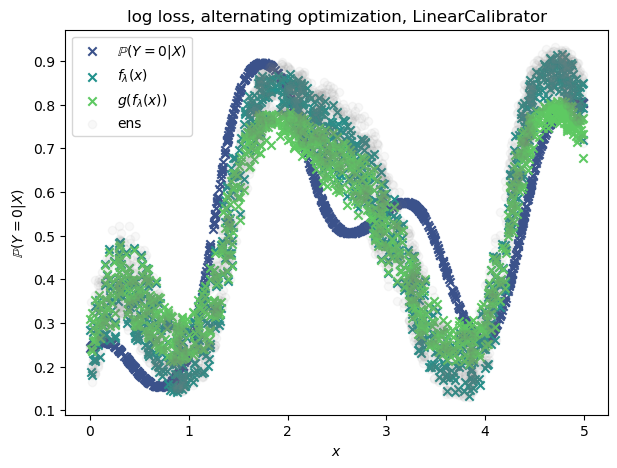

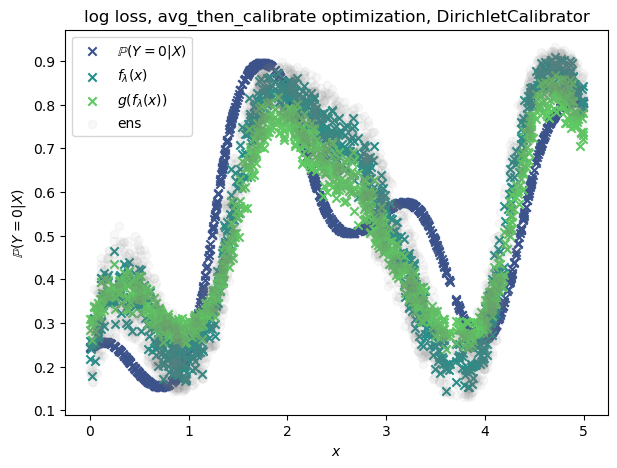

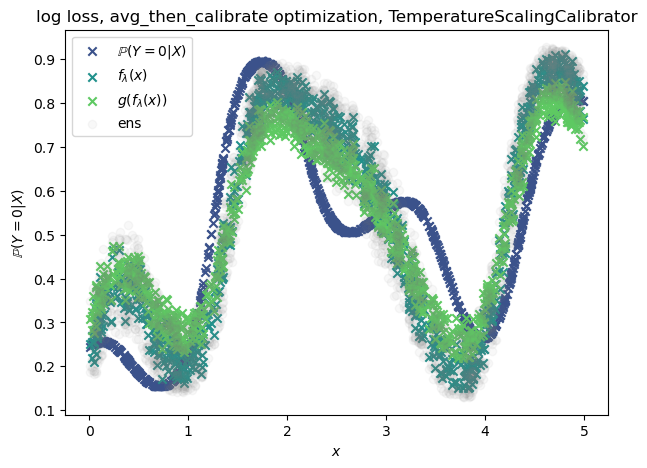

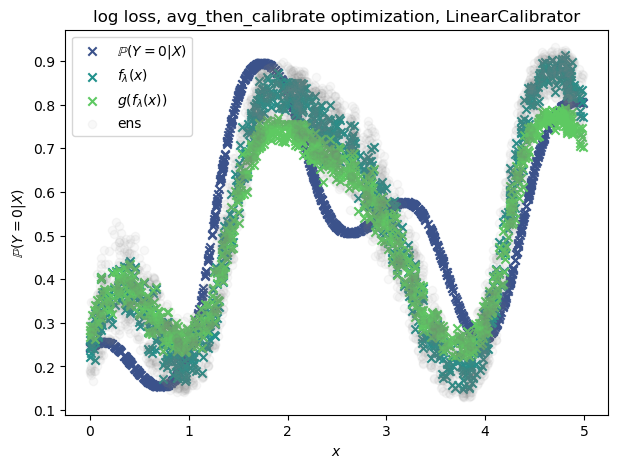

In [5]:
# model = CredalSetCalibrator(comb_model=MLPCalW, cal_model=DirichletCalibrator, in_channels=1,
#                            n_classes=2,n_ensembles=3, hidden_dim=64, hidden_layers=3)

losses = [GeneralizedBrierLoss(), GeneralizedLogLoss()]
train_modes = ["joint", "alternating", "avg_then_calibrate"]
cal_models = [DirichletCalibrator, TemperatureScalingCalibrator, LinearCalibrator]

for loss in losses:
    for train_mode in train_modes:
        for cal_model in cal_models:
            model = CredalSetCalibrator(comb_model=MLPCalW, cal_model=cal_model, in_channels=1,
                                        n_classes=2, n_ensembles=3, hidden_dim=64, hidden_layers=3)
            model, loss_train, loss_val = train_model(model, dataset_train=dataset, loss_fn=loss, train_mode=train_mode,
                                       n_epochs=1000, lr=1e-3, batch_size=128)
            plot_ens_comb_cal(experiment=exp, model=model, file_name=f"credal_set_gp_{loss.__name__}_{train_mode}_{cal_model.__name__}.png",
                              title=f"{loss.__name__}, {train_mode} optimization, {cal_model.__name__}",
                              output_path="../../figures/gp/", alpha_comb=1.0) 


### 2. Experiment

According to Vaicenavicious et al.

In [6]:
exp_2 = BinaryExperiment(
    method="logistic",
    n_samples=N_SAMPLES,
    n_ens=N_ENS,
    scale_noise=0.1,
    kernel_width=0.01,
)
exp_2.generate_data()
# init dataset
dataset_2 = MLPDataset(
    x_train=exp_2.x_inst,
    P=exp_2.ens_preds,
    y=exp_2.y_labels,
)
data_loader_2 = torch.utils.data.DataLoader(dataset_2, batch_size=64, shuffle=True)



Figure saved to: ../../figures/log/credal_set_log_brier loss_joint_DirichletCalibrator.png
Figure saved to: ../../figures/log/credal_set_log_brier loss_joint_TemperatureScalingCalibrator.png
Figure saved to: ../../figures/log/credal_set_log_brier loss_joint_LinearCalibrator.png
Figure saved to: ../../figures/log/credal_set_log_brier loss_alternating_DirichletCalibrator.png
Figure saved to: ../../figures/log/credal_set_log_brier loss_alternating_TemperatureScalingCalibrator.png
Figure saved to: ../../figures/log/credal_set_log_brier loss_alternating_LinearCalibrator.png
Figure saved to: ../../figures/log/credal_set_log_brier loss_avg_then_calibrate_DirichletCalibrator.png
Figure saved to: ../../figures/log/credal_set_log_brier loss_avg_then_calibrate_TemperatureScalingCalibrator.png
Figure saved to: ../../figures/log/credal_set_log_brier loss_avg_then_calibrate_LinearCalibrator.png
Figure saved to: ../../figures/log/credal_set_log_log loss_joint_DirichletCalibrator.png
Figure saved to: 

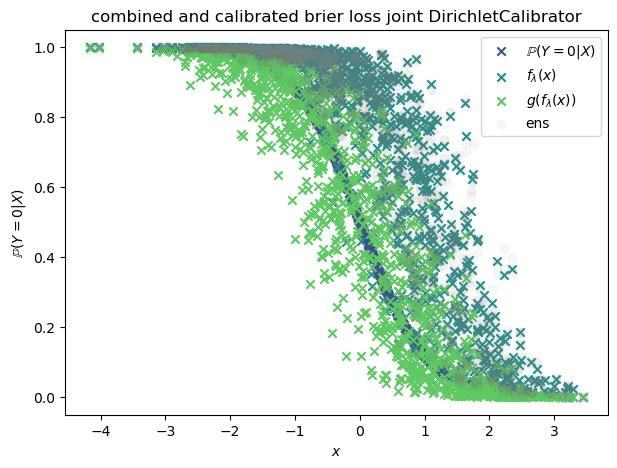

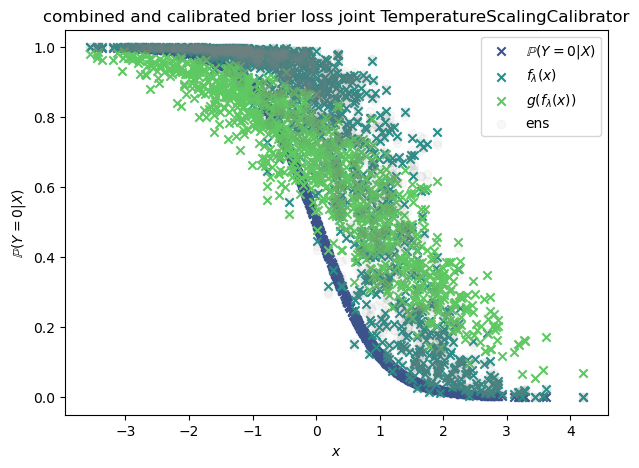

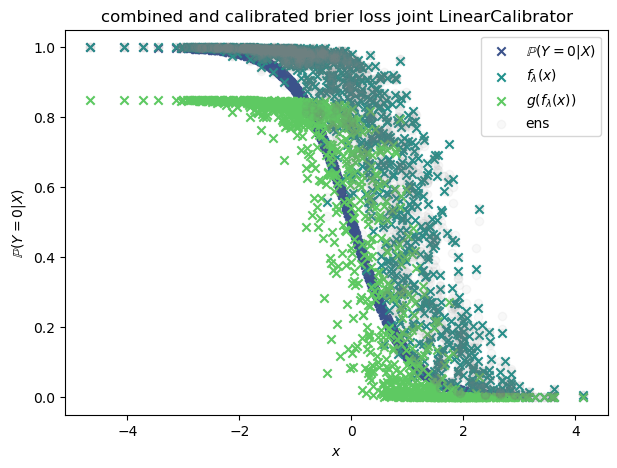

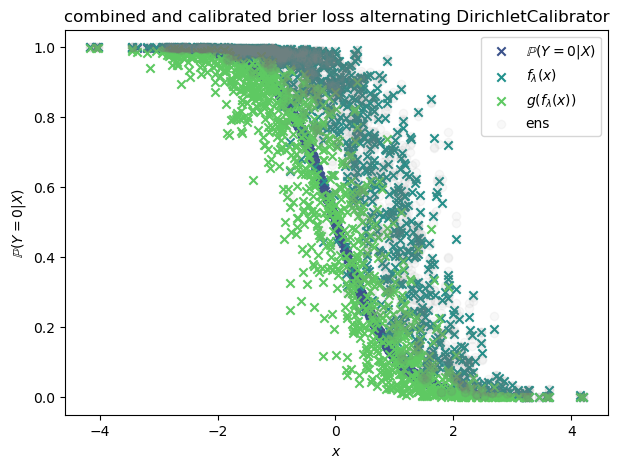

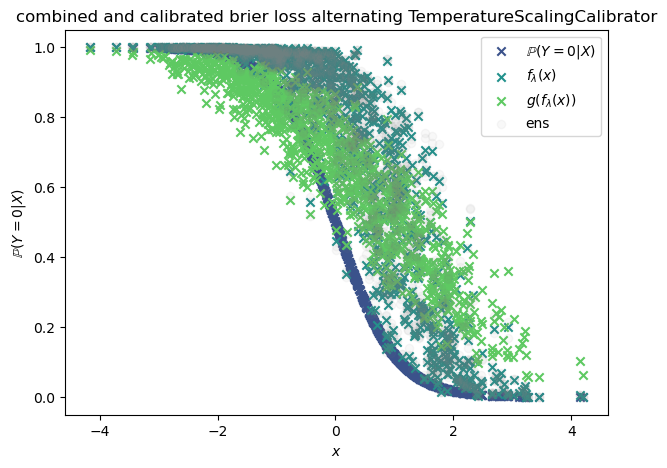

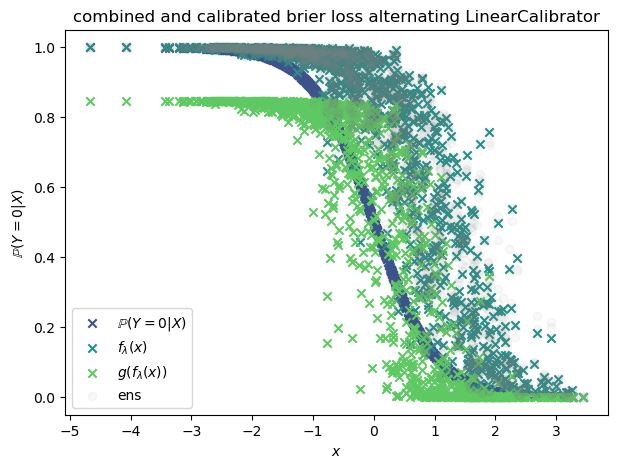

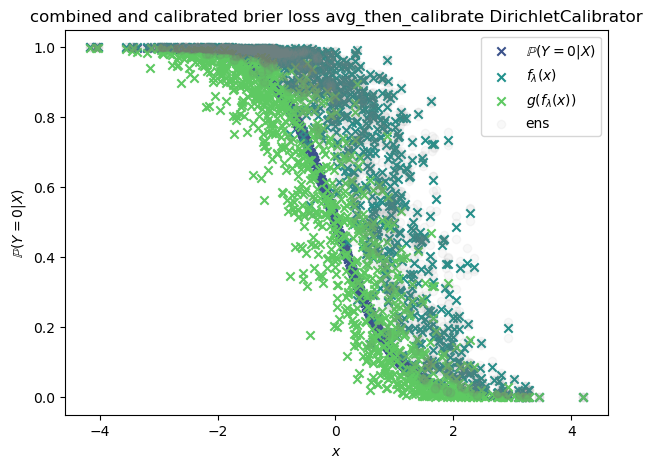

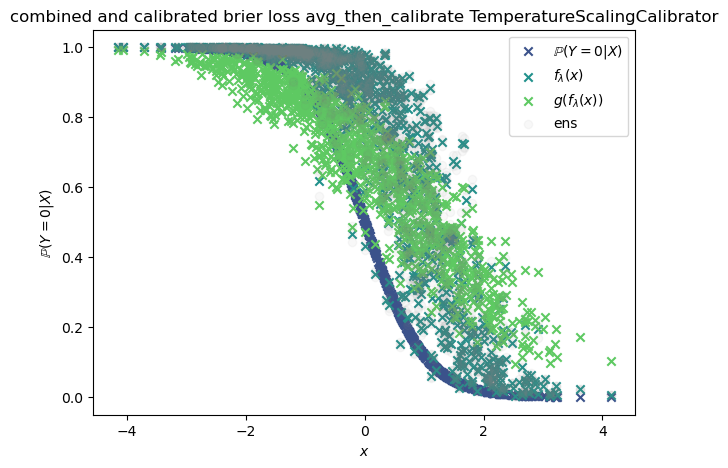

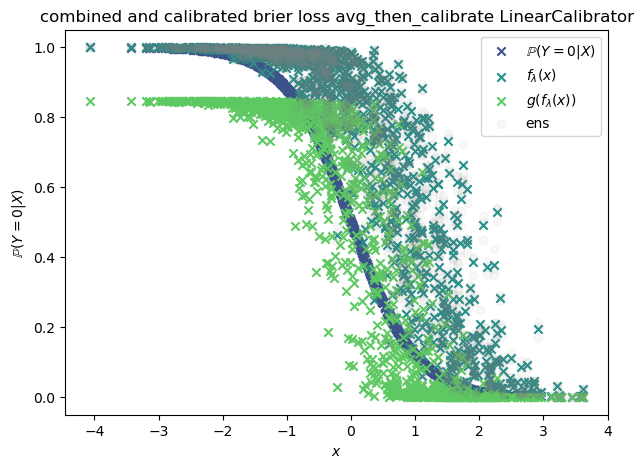

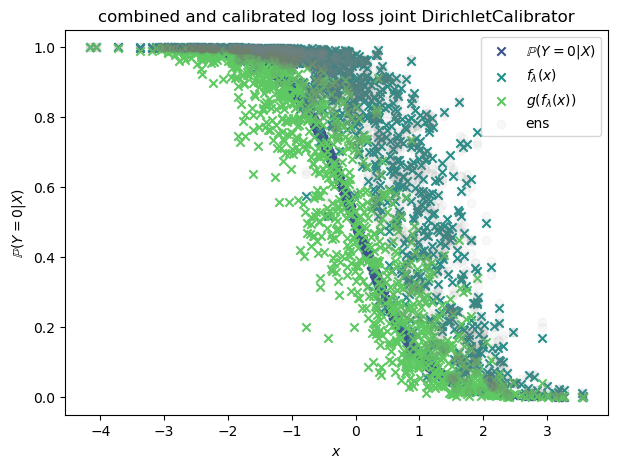

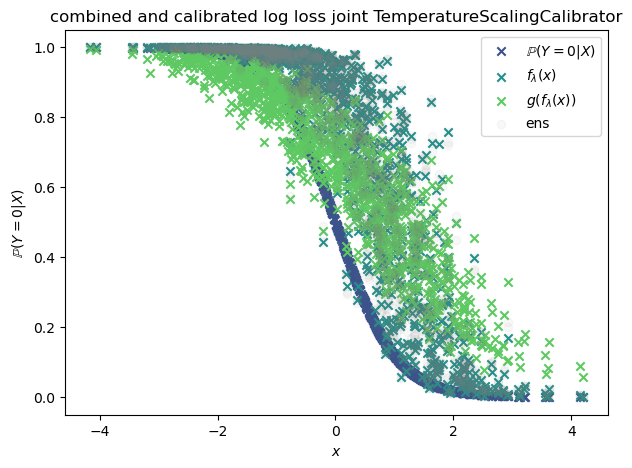

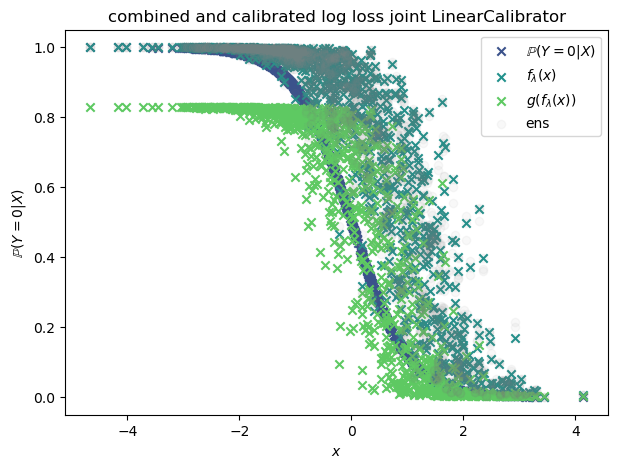

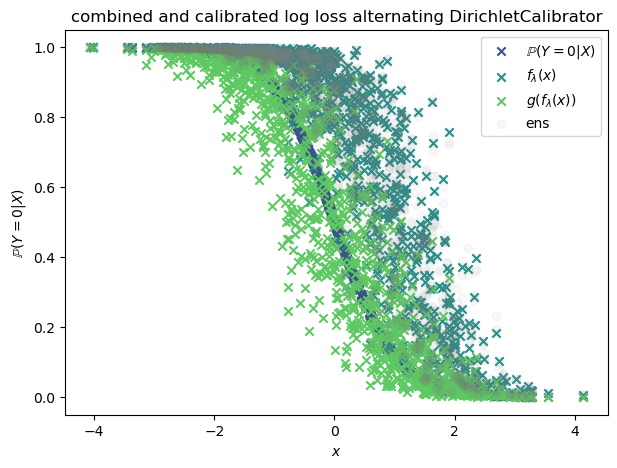

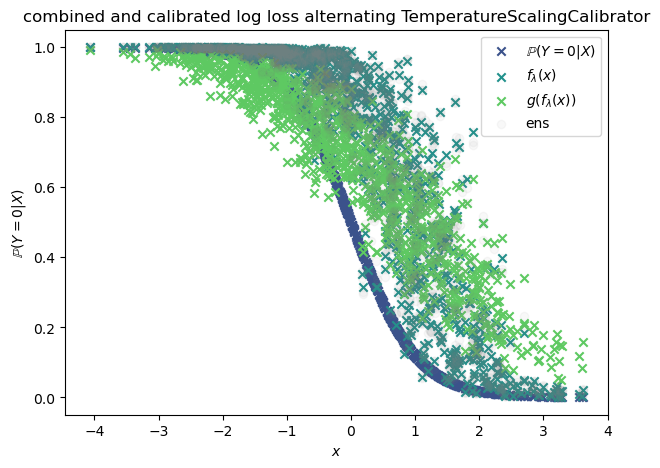

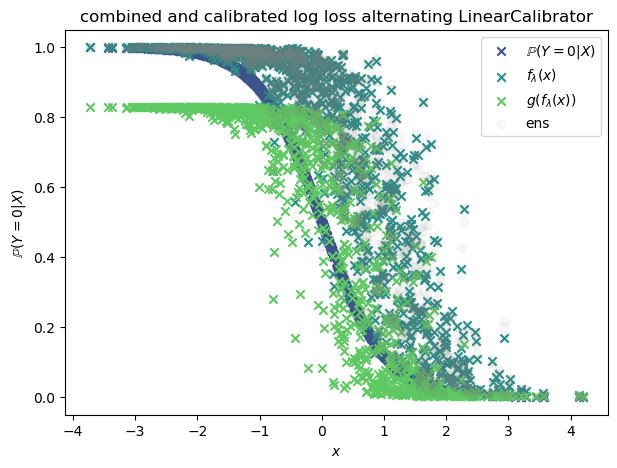

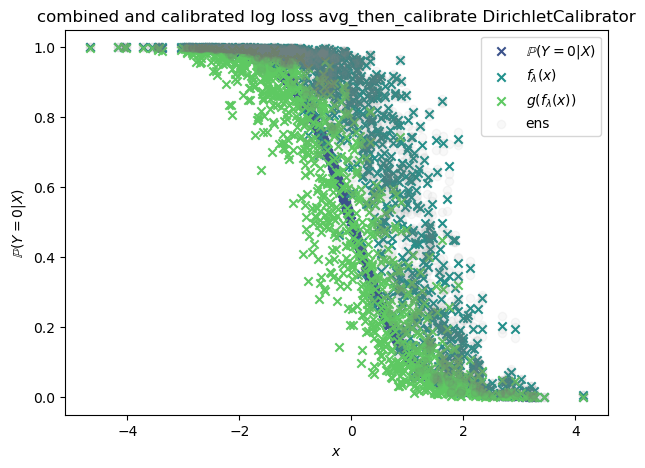

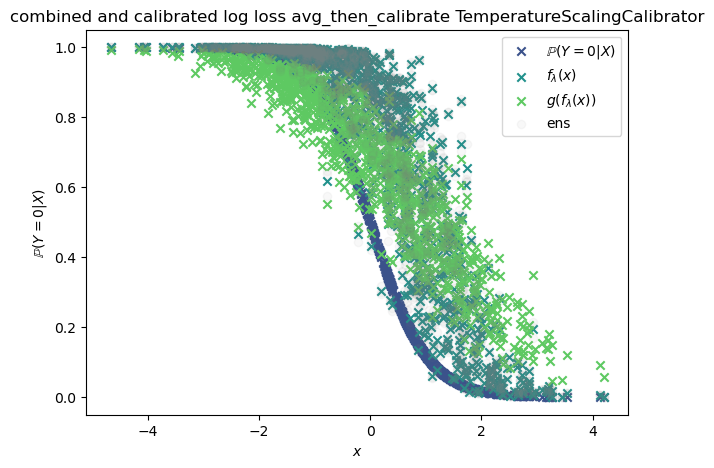

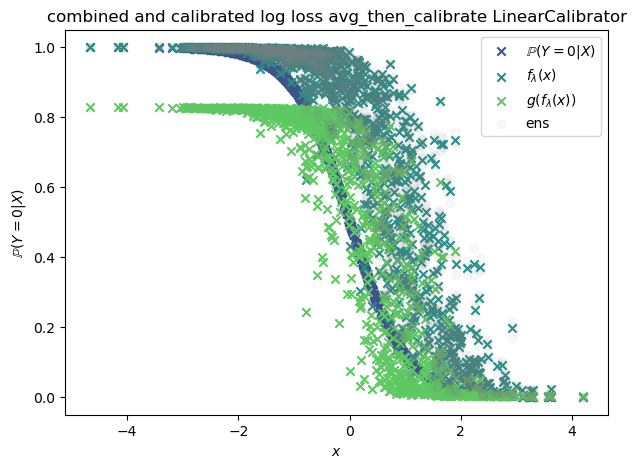

In [7]:
for loss in losses:
    for train_mode in train_modes:
        for cal_model in cal_models:
            model = CredalSetCalibrator(comb_model=MLPCalW, cal_model=cal_model, in_channels=1,
                                        n_classes=2, n_ensembles=3, hidden_dim=64, hidden_layers=3)
            model, loss_train, loss_val = train_model(model, dataset_train=dataset_2, loss_fn=loss, train_mode=train_mode,
                                       n_epochs=1000, lr=1e-3, batch_size=128)
            plot_ens_comb_cal(experiment=exp_2, model=model, file_name=f"credal_set_log_{loss.__name__}_{train_mode}_{cal_model.__name__}.png",
                              title=f"combined and calibrated {loss.__name__} {train_mode} {cal_model.__name__}",
                              output_path="../../figures/log/", alpha_comb=1.0) 


In [8]:
model = CredalSetCalibrator(comb_model=MLPCalW, cal_model=DirichletCalibrator, in_channels=1,
                           n_classes=2,n_ensembles=3, hidden_dim=64, hidden_layers=3)

In [9]:
# train model
model, loss_train, loss_val = train_model(
    model=model,
    dataset_train=dataset_2,
    loss_fn=GeneralizedLogLoss(),
    train_mode='joint',
    verbose=True,
    n_epochs=1000,
    lr=0.0005,
    batch_size=64,
)

Epoch 1/1000: train=0.6166
Epoch 10/1000: train=0.4631
Epoch 20/1000: train=0.4114
Epoch 30/1000: train=0.4026
Epoch 40/1000: train=0.4024
Epoch 50/1000: train=0.3968
Epoch 60/1000: train=0.3992
Epoch 70/1000: train=0.3998
Epoch 80/1000: train=0.3994
Epoch 90/1000: train=0.3983
Epoch 100/1000: train=0.4058
Epoch 110/1000: train=0.3963
Epoch 120/1000: train=0.3954
Epoch 130/1000: train=0.4018
Epoch 140/1000: train=0.4050
Epoch 150/1000: train=0.3978
Epoch 160/1000: train=0.3945
Epoch 170/1000: train=0.4008
Epoch 180/1000: train=0.3975
Epoch 190/1000: train=0.3931
Epoch 200/1000: train=0.3993
Epoch 210/1000: train=0.3945
Epoch 220/1000: train=0.3967
Epoch 230/1000: train=0.3978
Epoch 240/1000: train=0.3944
Epoch 250/1000: train=0.3930
Epoch 260/1000: train=0.3958
Epoch 270/1000: train=0.3967
Epoch 280/1000: train=0.3964
Epoch 290/1000: train=0.3946
Epoch 300/1000: train=0.3962
Epoch 310/1000: train=0.3976
Epoch 320/1000: train=0.3931
Epoch 330/1000: train=0.4007
Epoch 340/1000: train=0.3

/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_78465/4253013959.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p_cal, p_bar, weights = model(torch.tensor(exp_2.x_inst[:1000, :]).float(), torch.tensor(exp_2.ens_preds[:1000, :, :]).float())


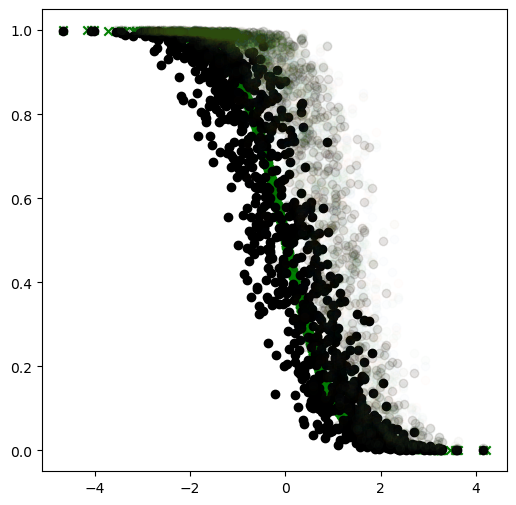

In [10]:
# plot predictions
p_cal, p_bar, weights = model(torch.tensor(exp_2.x_inst[:1000, :]).float(), torch.tensor(exp_2.ens_preds[:1000, :, :]).float())

# plot calibrated predictions
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(exp_2.x_inst.squeeze(), exp_2.p_true[:, 0], label="True", color="green", marker="x")
ax.scatter(exp_2.x_inst[:1000, :].squeeze(), p_bar[:, 0].detach(), color="black", label="Comb", alpha=0.1)
ax.scatter(exp_2.x_inst[:1000, :].squeeze(), p_cal[:, 0].detach(), label="Calibrated", color="black")

ax.scatter(exp_2.x_inst.squeeze(), exp_2.ens_preds[:, 0, 0], alpha=0.01)
ax.scatter(exp_2.x_inst.squeeze(), exp_2.ens_preds[:, 1, 0], alpha=0.01)
ax.scatter(exp_2.x_inst.squeeze(), exp_2.ens_preds[:, 2, 0], alpha=0.01)
